## K Means Clustering

**K-Means clustering** is an unsupervised learning algorithm which intends to partition $n$ objects into $k$ clusters. This method produces exactly $k$ different clusters of greatest possible distinction. The best number of clusters $k$ leading to the greatest separation is not known priori and must be computed from the data (we can use **elbow method**).

Given a set of observations $(x_1, x_2, ..., x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the given $n$ observations into $k$ sets $(S = {S_1, S_2, ..., S_k})$ so as to minimize the **within-cluster sum of squares (WCSS)** (i.e. total intra-cluster variance). Formally, the objective is to find minimum value for the cost function:
$$J = \sum_{i=1}^k \sum_{x \in S_i} \|x - \mu_i\|^2$$
where,  
$\mu_i$ is the mean of points in $S_i$.

<br>
**Algorithm**

> Given an initial (random) set of $k$ means $(m_1, m_2, ..., m_k)$ (centroids), the algorithm proceeds by alternating between two steps:
* **Assignment step:** Assign each observation to the cluster whose mean has the least squared Euclidean distance, this is intuitively the "nearest" mean.
* **Update step:** Calculate the new means (centroids) of the observations in the new clusters.
$$m_i = \frac {1} {|S_i|}\sum_{x_j \in S_i} x_j$$

> The algorithm has converged when the assignments no longer change. The algorithm does not guarantee to find the optimum solution.

> The algorithm is often presented as assigning objects to the nearest cluster by distance. We can use different distance functions like Euclidean distance, Manhattan distance, Cosine distance, etc. Using a different distance function other than Euclidean distance may stop the algorithm from converging.

<br>
**How to choose the value of K:**

> K-Means is relatively an efficient method. However, we need to specify the number of clusters in advance and the final results are sensitive to initialization and often terminates at a local optimum. Unfortunately there is no global theoretical method to find the optimal number of clusters. A common practical approach is to follow **elbow method** in which we plot the cost function for different values of $k$, then choose the maximum value of $k$ after which the plot flattens out. In general, a large $k$ probably decreases the error but increases the risk of overfitting.

<br>
**Assumptions:**

> * Assumes balanced cluster size within the dataset.
* Assumes the joint distribution of features within each cluster is spherical: this means that features within a cluster have equal variance, and also features are independent of each other.
* Clusters have similar density.

<br>
**Advantages:**

> * Practically works well even some assumptions are broken.
* Simple and easy to implement.
* Easy to interpret the clustering results.
* Fast and efficient in terms of computational cost.

<br>
**Disadvantages:**

> * Uniform effect: often produce clusters with relatively uniform size even if the input data have different cluster size.
* Spherical assumption is hard to be satisfied, cannot find non-convex clusters or clusters with unusual shapes.
* Different densities: may work poorly with clusters with different densities but spherical shape.
* Exact K value not known.
* Sensitive to outliers.
* Sensitive to initial points and local optimal, and there is no unique solution for a certain K value.

## K-Means Clustering - Demo Code:

We will build a model to implement clustering of data points using K-Means algorithm.

Let's get started...

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

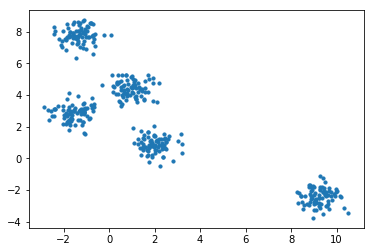

In [2]:
# generate data points
from sklearn.datasets.samples_generator import make_blobs

x, y = make_blobs(n_samples=400, centers=5,
                  cluster_std=0.5, random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=10)

In [3]:
# create model and fit on generated points
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(x)

predictions = model.predict(x)

In [4]:
predictions

array([0, 3, 2, 3, 2, 0, 3, 2, 4, 4, 3, 1, 4, 2, 0, 3, 3, 0, 4, 2, 3, 4, 4,
       2, 1, 0, 1, 3, 3, 3, 2, 2, 2, 3, 4, 4, 0, 2, 0, 1, 0, 0, 2, 1, 3, 0,
       0, 4, 2, 2, 2, 2, 4, 3, 2, 1, 0, 0, 3, 3, 1, 2, 1, 1, 3, 4, 4, 0, 0,
       3, 4, 4, 3, 4, 4, 0, 1, 4, 1, 2, 1, 1, 0, 2, 1, 2, 3, 1, 3, 4, 1, 2,
       2, 3, 4, 0, 2, 3, 4, 0, 1, 0, 0, 3, 4, 0, 0, 0, 4, 0, 2, 2, 1, 0, 0,
       4, 4, 1, 2, 4, 1, 3, 1, 1, 0, 0, 4, 3, 2, 3, 0, 2, 1, 1, 2, 3, 2, 1,
       4, 0, 0, 1, 3, 4, 0, 1, 4, 0, 3, 4, 0, 0, 1, 1, 0, 4, 1, 2, 0, 1, 2,
       3, 4, 1, 0, 3, 2, 2, 0, 1, 4, 1, 1, 3, 3, 0, 3, 0, 2, 3, 1, 1, 1, 3,
       0, 3, 3, 3, 3, 4, 3, 4, 1, 4, 0, 0, 4, 1, 3, 2, 3, 4, 4, 0, 4, 4, 1,
       3, 2, 1, 0, 2, 3, 4, 4, 3, 2, 3, 0, 4, 1, 0, 4, 1, 3, 4, 2, 2, 3, 1,
       2, 4, 0, 2, 1, 2, 4, 0, 1, 0, 0, 2, 1, 4, 0, 4, 3, 4, 4, 1, 1, 2, 0,
       2, 4, 3, 1, 4, 2, 3, 2, 4, 0, 4, 3, 1, 4, 3, 3, 3, 1, 4, 4, 4, 4, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1, 3, 4, 2, 1, 4, 3,
       0, 4,

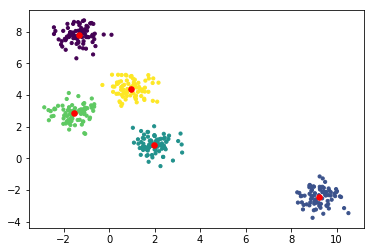

In [5]:
# plot the clusters along with centroids for K-Means Clustering
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x, num_clusters, seed=0):
    # randomly choose centroids
    rndm = np.random.RandomState(seed)
    i = rndm.permutation(x.shape[0])[:num_clusters]
    centers = x[i]
    
    while True:
        # assign labels based on closest centroid
        labels = pairwise_distances_argmin(x, centers)
        
        # find new centroids from mean of points
        new_centers = np.array([x[labels == i].mean(0) for i in range(num_clusters)])
        
        # check convergence
        if(np.all(centers == new_centers)):
            break
            
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(x, 5)

plt.scatter(x[:, 0], x[:, 1], c=predictions, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30)